# Importing Repositories

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import holidays
from scipy import stats
warnings.filterwarnings("ignore")
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize']=(20,10)

In [2]:
def missing_zero_values_table(df):
        ''''Takes a pandas dataframe and returns a statistics table that explains the missing and 
        zero values'''
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Our selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
    
        return mz_table

# Importing data files

## Paths for files

In [3]:
path_price = r'C:\Users\2836589S\OneDrive - University of Glasgow\Data\DayAheadPrices_12.1.D'
path_totalload = r'C:\Users\2836589S\OneDrive - University of Glasgow\Data\DayAheadTotalLoadForecast'
path_windsolar = r'C:\Users\2836589S\OneDrive - University of Glasgow\Data\DayAheadGenerationForecastForWindAndSolar_14.1.D'

## Price Timeseries Importing

In [4]:

df_price = pd.read_csv(r'C:\Users\2836589S\OneDrive - University of Glasgow\Data\Data Frames\price_timeseries_outliers.csv', 
parse_dates=['DateTime'])


In [5]:
df_price = df_price[['DateTime', 'Year', 'Month','Week', 'Day', 'Hour', 'Price']]
df_price

,DateTime,Year,Month,Week,Day,Hour,Price
0,2015-01-01 00:00:00,2015,1,1,3,0,0.00
1,2015-01-01 01:00:00,2015,1,1,3,1,0.00
2,2015-01-01 02:00:00,2015,1,1,3,2,0.00
3,2015-01-01 03:00:00,2015,1,1,3,3,0.00
4,2015-01-01 04:00:00,2015,1,1,3,4,0.00
...,...,...,...,...,...,...,...
52529,2020-12-31 18:00:00,2020,12,53,3,18,71.30
52530,2020-12-31 19:00:00,2020,12,53,3,19,61.04
52531,2020-12-31 20:00:00,2020,12,53,3,20,60.39
52532,2020-12-31 21:00:00,2020,12,53,3,21,57.96


## Wind and Solar Timeseries Importing

In [6]:
f_windsolar = glob.glob(path_windsolar + "/*.csv")
dwindsolar = [pd.read_csv(f, sep='\t', parse_dates=['DateTime']) for f in f_windsolar]

df_windsolar = pd.concat(dwindsolar)
df_windsolar = df_windsolar[df_windsolar['AreaCode'] == '10YGB----------A']
df_windsolar = df_windsolar[['DateTime', 'ProductionType', 'AggregatedGenerationForecast']]
df_windsolar.sort_values(by='DateTime', ascending=True)
df_windsolar.reset_index(drop=True, inplace=True)

In [7]:
df_windsolar

,DateTime,ProductionType,AggregatedGenerationForecast
0,2014-12-30 00:00:00,Solar,0.00
1,2014-12-30 01:00:00,Solar,0.00
2,2014-12-30 02:00:00,Solar,0.00
3,2014-12-30 03:00:00,Solar,0.00
4,2014-12-30 04:00:00,Solar,0.00
...,...,...,...
509107,2021-06-14 19:00:00,Wind Offshore,1563.23
509108,2021-06-14 20:00:00,Wind Offshore,1590.47
509109,2021-06-14 21:00:00,Wind Offshore,1574.14
509110,2021-06-14 22:00:00,Wind Offshore,1450.72


### Splitting the WindSolar Dataset into 3 Datasets per Solar, Wind Offshore, Wind Onshore

In [8]:
df_windsolar['ProductionType'].unique()

array(['Solar', 'Wind Offshore', 'Wind Onshore'], dtype=object)

In [9]:
df_solar = df_windsolar[df_windsolar['ProductionType'] == 'Solar']
df_solar.sort_values(by='DateTime', ascending=True)
df_solar.reset_index(drop=True, inplace=True)
df_solar.rename(columns={'AggregatedGenerationForecast':'SolarGeneration'}, inplace=True)
df_solar = df_solar[['DateTime','SolarGeneration']]
df_solar

,DateTime,SolarGeneration
0,2014-12-30 00:00:00,0.0
1,2014-12-30 01:00:00,0.0
2,2014-12-30 02:00:00,0.0
3,2014-12-30 03:00:00,0.0
4,2014-12-30 04:00:00,0.0
...,...,...
169699,2021-06-14 19:00:00,227.0
169700,2021-06-14 20:00:00,11.5
169701,2021-06-14 21:00:00,0.0
169702,2021-06-14 22:00:00,0.0


In [10]:
df_wind_off = df_windsolar[df_windsolar['ProductionType'] == 'Wind Offshore']
df_wind_off.sort_values(by='DateTime', ascending=True)
df_wind_off.reset_index(drop=True, inplace=True)
df_wind_off.rename(columns={'AggregatedGenerationForecast':'WindOffGeneration'}, inplace=True)
df_wind_off = df_wind_off[['DateTime', 'WindOffGeneration']]
df_wind_off

,DateTime,WindOffGeneration
0,2014-12-30 00:00:00,996.58
1,2014-12-30 01:00:00,1059.20
2,2014-12-30 02:00:00,1123.27
3,2014-12-30 03:00:00,1177.54
4,2014-12-30 04:00:00,1188.21
...,...,...
169699,2021-06-14 19:00:00,1563.23
169700,2021-06-14 20:00:00,1590.47
169701,2021-06-14 21:00:00,1574.14
169702,2021-06-14 22:00:00,1450.72


In [11]:
df_wind_on = df_windsolar[df_windsolar['ProductionType'] == 'Wind Onshore']
df_wind_on.sort_values(by='DateTime', ascending=True)
df_wind_on.reset_index(drop=True, inplace=True)
df_wind_on.rename(columns={'AggregatedGenerationForecast':'WindOnGeneration'}, inplace=True)
df_wind_on = df_wind_on[['DateTime','WindOnGeneration']]
df_wind_on

,DateTime,WindOnGeneration
0,2014-12-30 00:00:00,2363.80
1,2014-12-30 01:00:00,2413.88
2,2014-12-30 02:00:00,2450.75
3,2014-12-30 03:00:00,2500.78
4,2014-12-30 04:00:00,2536.07
...,...,...
169699,2021-06-14 19:00:00,4896.71
169700,2021-06-14 20:00:00,3928.19
169701,2021-06-14 21:00:00,3277.03
169702,2021-06-14 22:00:00,2880.91


# Merging Datasets

In [12]:
# Merging Price, Solar Generation, Wind offshore and Wind onshore generation datasets to one

df_merged = pd.merge(df_price, df_solar, how='left', on='DateTime')
df_merged = pd.merge(df_merged, df_wind_off, how='left', on='DateTime')
df_merged = pd.merge(df_merged, df_wind_on, how='left', on='DateTime')
df_merged.drop_duplicates(subset=['DateTime'], keep='first', inplace=True)
df_model = pd.DataFrame()
df_model = df_merged[['Price','Year', 'Month', 'Day', 'Hour', 'SolarGeneration', 'WindOffGeneration',
'WindOnGeneration']]
df_model.set_index(df_merged['DateTime'], inplace=True)
df_model

,Price,Year,Month,Day,Hour,SolarGeneration,WindOffGeneration,WindOnGeneration
DateTime,,,,,,,,
2015-01-01 00:00:00,0.00,2015,1,3,0,0.0,2987.05,4013.58
2015-01-01 01:00:00,0.00,2015,1,3,1,0.0,2926.71,4074.53
2015-01-01 02:00:00,0.00,2015,1,3,2,0.0,2867.00,4157.48
2015-01-01 03:00:00,0.00,2015,1,3,3,0.0,2808.72,4229.50
2015-01-01 04:00:00,0.00,2015,1,3,4,0.0,2769.59,4133.56
...,...,...,...,...,...,...,...,...
2020-12-31 18:00:00,71.30,2020,12,3,18,0.0,2644.97,3028.41
2020-12-31 19:00:00,61.04,2020,12,3,19,0.0,2707.55,3046.72
2020-12-31 20:00:00,60.39,2020,12,3,20,0.0,2695.01,3053.60


## Transforming Solar, Wind Onshore and Wind Offshore Generation values

In [13]:
# Apply square root transformation to our predictors in order to have the scale with our dependent variable (Price)

df_model['SolarGeneration'] = df_model['SolarGeneration'].transform('sqrt')
df_model['WindOffGeneration'] = df_model['WindOffGeneration'].transform('sqrt')
df_model['WindOnGeneration'] = df_model['WindOnGeneration'].transform('sqrt')

# Re-forming our dataset

## Creating single-hour data blocks

In [14]:
df_model.dropna(inplace=True) # Clearing na values

#Create multi-dataframe that will have every single dataset regarding the time of the day

hours = df_model['Hour'].unique().tolist()
df_hour ={hour: pd.DataFrame() for hour in hours}
for i in range(len(hours)):
    df_hour[i] = df_model[df_model['Hour'] == i]
    df_hour[i] = df_hour[i][(np.abs(stats.zscore(df_hour[i]['Price']))<3)]


# Example of the dataset of 00:00    
df_hour[0]


,Price,Year,Month,Day,Hour,SolarGeneration,WindOffGeneration,WindOnGeneration
DateTime,,,,,,,,
2015-01-02,27.94,2015,1,4,0,0.0,59.645788,73.214411
2015-01-03,35.94,2015,1,5,0,0.0,53.118358,65.199233
2015-01-04,40.01,2015,1,6,0,0.0,22.629406,31.585440
2015-01-05,36.55,2015,1,0,0,0.0,33.416762,48.506288
2015-01-06,36.02,2015,1,1,0,0.0,42.693442,58.826100
...,...,...,...,...,...,...,...,...
2020-12-27,4.70,2020,12,6,0,0.0,98.853933,88.450438
2020-12-28,56.00,2020,12,0,0,0.0,61.641950,47.702096
2020-12-29,64.95,2020,12,1,0,0.0,34.614737,40.164039


In [15]:
type(df_hour[0])

pandas.core.frame.DataFrame

## Creating lags (6 month lags)

In [16]:
# Creating list of lags till 
lags = list(range(1,90))

In [17]:
type(lags)

list

In [18]:
def lag_col(df, variable, lags):
    '''
        Takes in a pandas dataframe, a specific variable of the dataset and number of lags as a list
        and returns the df updated with the lags of the variable
        
        Parameters:
            df: pandas dataframe
            variable: string
            lags: list
        
        Returns:
            Adds column for every lag inside the list for our designated variable
        
        '''


    for lag in lags:
        df[str(variable) + '_' + str(lag)] = df[variable].shift(lag)
    return df

In [19]:
# Create lags for every single data frame for Solar Generation, Wind Offshore Generation and Wind Onshore Generation

for i in range(len(hours)):
        lag_col(df_hour[i], 'Price', lags)
        lag_col(df_hour[i], 'SolarGeneration', lags)
        lag_col(df_hour[i], 'WindOffGeneration', lags)
        lag_col(df_hour[i], 'WindOnGeneration', lags)

# Example of data frame for 00:00
df_hour[0]

,Price,Year,Month,Day,Hour,SolarGeneration,WindOffGeneration,WindOnGeneration,Price_1,Price_2,...,WindOnGeneration_80,WindOnGeneration_81,WindOnGeneration_82,WindOnGeneration_83,WindOnGeneration_84,WindOnGeneration_85,WindOnGeneration_86,WindOnGeneration_87,WindOnGeneration_88,WindOnGeneration_89
DateTime,,,,,,,,,,,,,,,,,,,,,
2015-01-02,27.94,2015,1,4,0,0.0,59.645788,73.214411,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,35.94,2015,1,5,0,0.0,53.118358,65.199233,27.94,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,40.01,2015,1,6,0,0.0,22.629406,31.585440,35.94,27.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,36.55,2015,1,0,0,0.0,33.416762,48.506288,40.01,35.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,36.02,2015,1,1,0,0.0,42.693442,58.826100,36.55,40.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,4.70,2020,12,6,0,0.0,98.853933,88.450438,29.98,59.90,...,37.965247,68.405555,41.381759,34.679677,44.248277,64.931348,36.439539,34.901719,51.837535,70.416191
2020-12-28,56.00,2020,12,0,0,0.0,61.641950,47.702096,4.70,29.98,...,40.289701,37.965247,68.405555,41.381759,34.679677,44.248277,64.931348,36.439539,34.901719,51.837535
2020-12-29,64.95,2020,12,1,0,0.0,34.614737,40.164039,56.00,4.70,...,70.566139,40.289701,37.965247,68.405555,41.381759,34.679677,44.248277,64.931348,36.439539,34.901719


In [20]:
# Dropping unwanted features for every single dataset and dropping the nan values
for i in range(len(hours)):
    df_hour[i].drop(columns=['Year','Day','Month','Hour'], inplace=True)
    df_hour[i].dropna(inplace=True)

# Example of data frame regarding the 23:00 data frame
df_hour[23]

,Price,SolarGeneration,WindOffGeneration,WindOnGeneration,Price_1,Price_2,Price_3,Price_4,Price_5,Price_6,...,WindOnGeneration_80,WindOnGeneration_81,WindOnGeneration_82,WindOnGeneration_83,WindOnGeneration_84,WindOnGeneration_85,WindOnGeneration_86,WindOnGeneration_87,WindOnGeneration_88,WindOnGeneration_89
DateTime,,,,,,,,,,,,,,,,,,,,,
2015-04-02 23:00:00,41.15,0.0,32.012341,34.969558,38.93,37.00,26.88,27.90,40.04,43.60,...,72.091747,73.886873,73.090423,65.946721,47.135125,57.000526,50.226288,35.443899,64.847513,69.295815
2015-04-03 23:00:00,39.28,0.0,42.885312,42.531870,41.15,38.93,37.00,26.88,27.90,40.04,...,65.638937,72.091747,73.886873,73.090423,65.946721,47.135125,57.000526,50.226288,35.443899,64.847513
2015-04-04 23:00:00,38.96,0.0,17.934882,18.936737,39.28,41.15,38.93,37.00,26.88,27.90,...,65.091781,65.638937,72.091747,73.886873,73.090423,65.946721,47.135125,57.000526,50.226288,35.443899
2015-04-05 23:00:00,40.37,0.0,16.198148,14.329341,38.96,39.28,41.15,38.93,37.00,26.88,...,68.855646,65.091781,65.638937,72.091747,73.886873,73.090423,65.946721,47.135125,57.000526,50.226288
2015-04-06 23:00:00,34.27,0.0,11.195535,31.527448,40.37,38.96,39.28,41.15,38.93,37.00,...,62.133646,68.855646,65.091781,65.638937,72.091747,73.886873,73.090423,65.946721,47.135125,57.000526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25 23:00:00,49.40,0.0,81.688800,77.979228,64.00,57.91,67.43,47.90,41.97,35.49,...,67.206250,39.678710,31.959349,48.446156,56.028564,38.577973,32.693730,57.493826,70.214813,55.626702
2020-12-27 23:00:00,42.00,0.0,47.064955,42.775811,49.40,64.00,57.91,67.43,47.90,41.97,...,41.199029,67.206250,39.678710,31.959349,48.446156,56.028564,38.577973,32.693730,57.493826,70.214813
2020-12-28 23:00:00,63.99,0.0,44.310721,43.196296,42.00,49.40,64.00,57.91,67.43,47.90,...,41.274326,41.199029,67.206250,39.678710,31.959349,48.446156,56.028564,38.577973,32.693730,57.493826


# Lasso Model

## Dataset Split

In [21]:
# Splitting every dataset for our dependent and independent variables 

X = {hour: pd.DataFrame() for hour in hours}
y = {hour: pd.DataFrame() for hour in hours}
for hour in range(len(hours)):
    X[hour] = df_hour[hour].drop(columns='Price')
    y[hour] = df_hour[hour].Price

## Lasso Regressor and TimeSeriesSplit

In [22]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import TimeSeriesSplit

# Creating the object that will be used during the cross-validation, with 5 folds
tscv = TimeSeriesSplit(n_splits=5)


# Create empty dataframes with hour as index in order to fill the trained models, and train them accordingly
model = {hour: pd.DataFrame() for hour in hours}



# We will traing every model for every hour, and we generate a data frame that will inform us about the r-squared,
# alpha value and intercept for every model

rsquared = []
alphaval = []
model_name = []
intercept = []


for hour in hours:
    model[hour] = LassoCV(cv=tscv, random_state=0).fit(X[hour],y[hour])
    rsquared.append(model[hour].score(X[hour], y[hour]))
    alphaval.append(model[hour].alpha_)
    intercept.append(model[hour].intercept_)
    model_name.append('model[' + str(hour) + ']')

model_results = pd.DataFrame(columns=['Model', 'Rsquared Value', 'Alpha Value', 'Intercept'])
model_results['Model'] = model_name
model_results['Rsquared Value'] = rsquared
model_results['Alpha Value'] = alphaval
model_results['Intercept'] = intercept


# Table that shows the results for every trained model
model_results

,Model,Rsquared Value,Alpha Value,Intercept
0,model[0],0.810202,0.704555,1.886106
1,model[1],0.823778,0.593897,1.547276
2,model[2],0.821407,0.852794,1.596398
3,model[3],0.809742,1.448081,2.168243
4,model[4],0.795812,1.401825,1.842723
5,model[5],0.792175,1.787960,1.423663
6,model[6],0.791240,2.227064,1.317727
7,model[7],0.763707,3.115532,2.616133
8,model[8],0.746376,3.461873,3.371780
9,model[9],0.779717,2.051425,3.180786


In [23]:
# Create multi data frame that will inform us about its coefficients with a descending order

df_coef = {hour: pd.DataFrame() for hour in hours}
for hour in hours:
    df_coef[hour].index = X[hour].transpose().index
    df_coef[hour]['Coefficients'] = model[hour].coef_.transpose()
    df_coef[hour].sort_values(by='Coefficients', ascending=False, inplace=True)
    df_coef[hour]

# Example of coefficient table of our top 10 coefficients for hour 8:00
a = df_coef[8].head(10)


Text(0.5, 0, 'Coefficients')

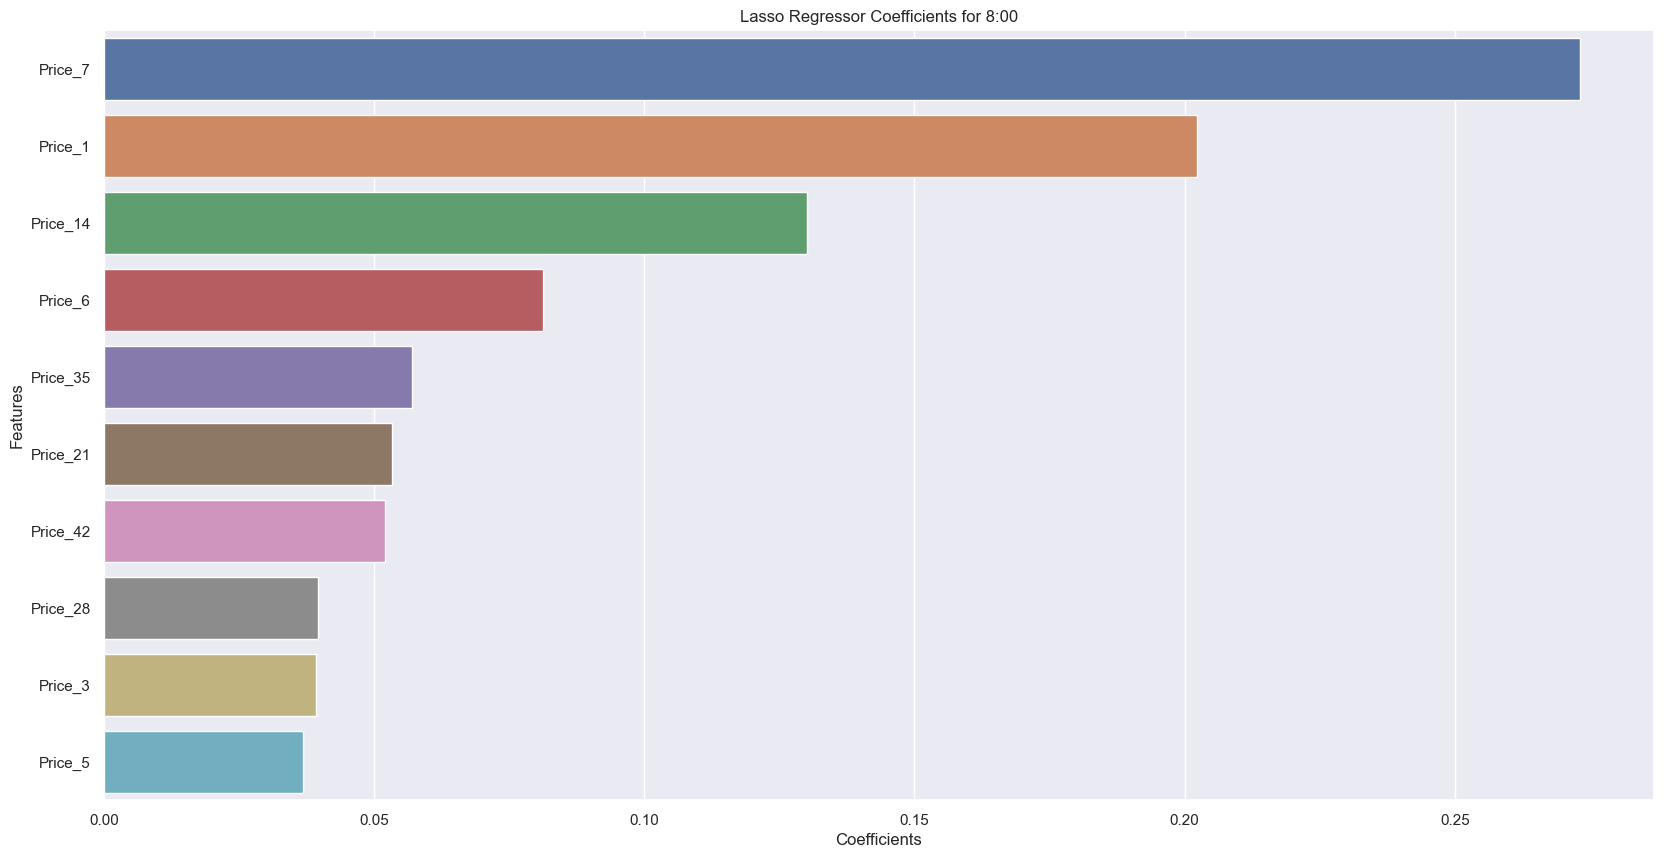

In [24]:
# Barplot for top 10 coeffiecients (features) for hour 8:00

sns.barplot(x=a['Coefficients'],y=a.index )
plt.title('Lasso Regressor Coefficients for 8:00')
plt.ylabel('Features')
plt.xlabel('Coefficients')

In [25]:
# Create multi data frame that will provides us with the residuals and squared residuals for every trained model, 
# for every hour


lasso = {hour: pd.DataFrame() for hour in hours}

for hour in hours:
    lasso[hour] = pd.DataFrame(columns=['Actual Value', 'Predicted Value', 'Residual', 'Squared Residuals'])
    lasso[hour]['Actual Value'] = y[hour]
    lasso[hour]['Predicted Value'] = model[hour].predict(X[hour])
    lasso[hour]['Residual'] = lasso[hour]['Actual Value'] - lasso[hour]['Predicted Value']
    lasso[hour]['Squared Residuals'] = lasso[hour]['Residual'].mul(lasso[hour]['Residual'])


# Example of the table
lasso[15]

,Actual Value,Predicted Value,Residual,Squared Residuals
DateTime,,,,
2015-04-03 15:00:00,50.07,42.972363,7.097637,50.376456
2015-04-04 15:00:00,40.90,44.068806,-3.168806,10.041332
2015-04-05 15:00:00,41.58,41.387799,0.192201,0.036941
2015-04-06 15:00:00,40.00,41.051641,-1.051641,1.105950
2015-04-07 15:00:00,41.98,43.853951,-1.873951,3.511693
...,...,...,...,...
2020-12-27 15:00:00,50.70,44.858815,5.841185,34.119446
2020-12-28 15:00:00,48.19,53.959197,-5.769197,33.283635
2020-12-29 15:00:00,53.76,49.889941,3.870059,14.977355


## Garch Model

In [26]:
from arch import arch_model

# Using arch_lasso_exp as an example, variable b takes an int number pointing the hour 
# we want to produce the arch model

b = 13

arch_lasso_exp = arch_model(lasso[b]['Residual'], vol='GARCH', p=1,q=1, dist='t', mean='Constant')
arch_lasso_exp = arch_lasso_exp.fit()
arch_lasso_exp.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 11190.189579957821
Iteration:      2,   Func. Count:     16,   Neg. LLF: 55088.92757455548
Iteration:      3,   Func. Count:     25,   Neg. LLF: 5725.68026769811
Iteration:      4,   Func. Count:     32,   Neg. LLF: 7285.255443579175
Iteration:      5,   Func. Count:     39,   Neg. LLF: 5581.647678622601
Iteration:      6,   Func. Count:     46,   Neg. LLF: 5640.372473709032
Iteration:      7,   Func. Count:     54,   Neg. LLF: 5576.095721239839
Iteration:      8,   Func. Count:     61,   Neg. LLF: 5569.829233078658
Iteration:      9,   Func. Count:     68,   Neg. LLF: 5567.687513118286
Iteration:     10,   Func. Count:     75,   Neg. LLF: 5566.586475410263
Iteration:     11,   Func. Count:     81,   Neg. LLF: 5566.586254720958
Iteration:     12,   Func. Count:     87,   Neg. LLF: 5566.586250596607
Iteration:     13,   Func. Count:     93,   Neg. LLF: 5566.586245092839
Iteration:     14,   Func. Count:     98,   Neg. LLF: 5566.58624

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                     Residual   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -5566.59
Distribution:      Standardized Student's t   AIC:                           11143.2
Method:                  Maximum Likelihood   BIC:                           11171.3
                                              No. Observations:                 2070
Date:                      Thu, Jan 26 2023   Df Residuals:                     2069
Time:                              12:46:53   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.1162  7.304e-02     -1.591      0.111 [ -0.259,2.691e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.1914  8.209e-02      2.331  1.973e-02   [3.050e-02,  0.352]
alpha[1]       0.0380  1.184e-02      3.213  1.314e-03 [1.483e-02,6.125e-02]
beta[1]        0.9513  1.482e-02     64.209      0.000     [  0.922,  0.980]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             4.8055      0.527      9.113  7.999e-20 [  3.772,  5.839]
========================================================================

Covariance estimator: robust
"""

Text(0.5, 1.0, 'Volatility for 13:00')

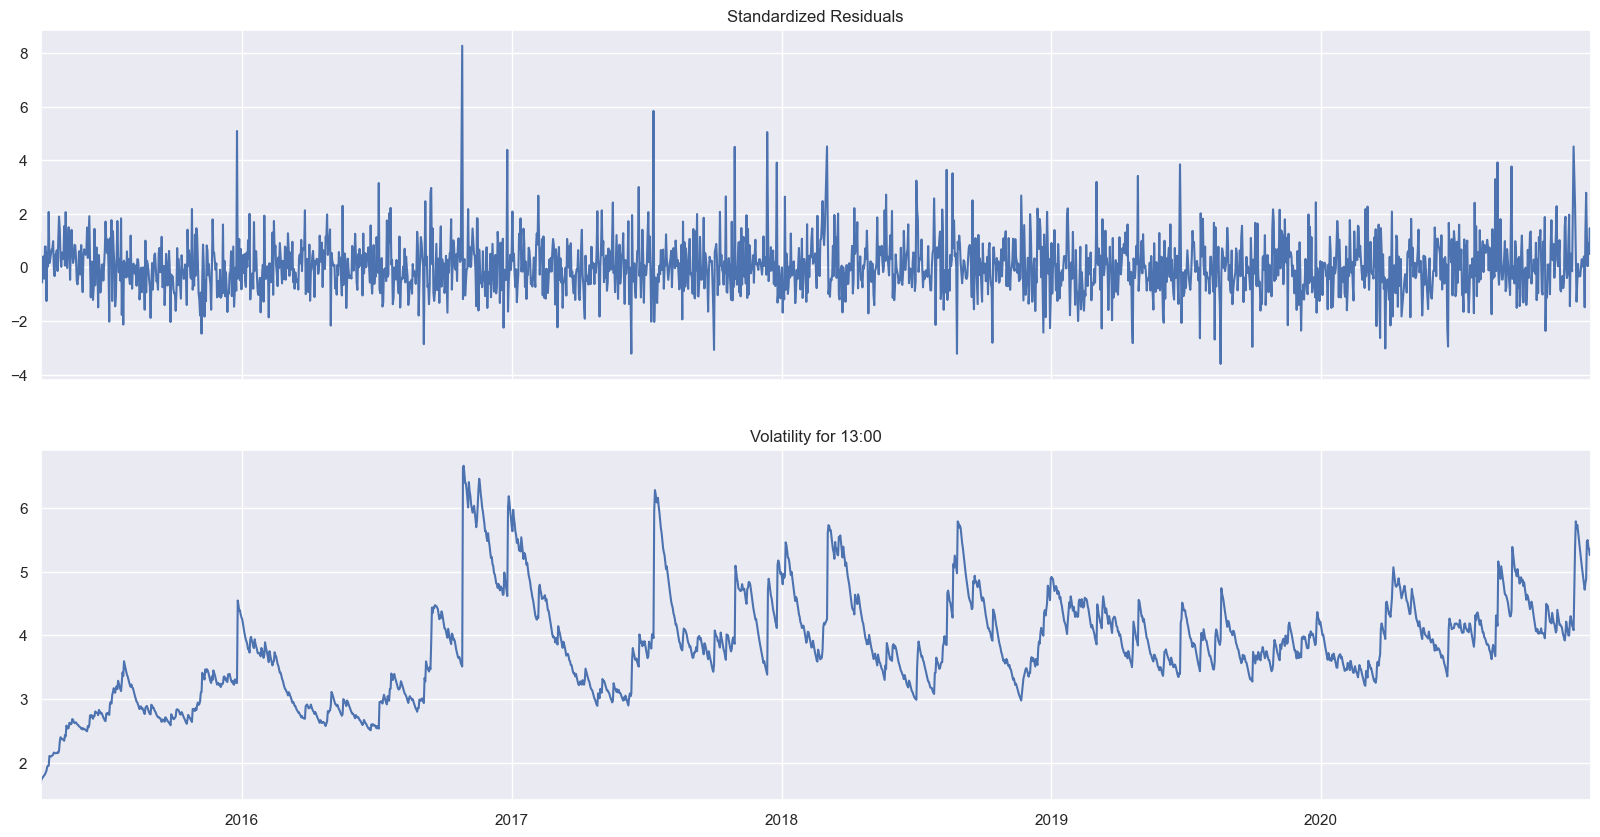

In [27]:
# Producing conditional volatility plot for our garch model

arch_lasso_exp.plot();
plt.title('Volatility for ' + str(b) + ':00')


Text(0.5, 1.0, 'Distribution of Standardized Residuals for GARCH(1,1) - 13:00')

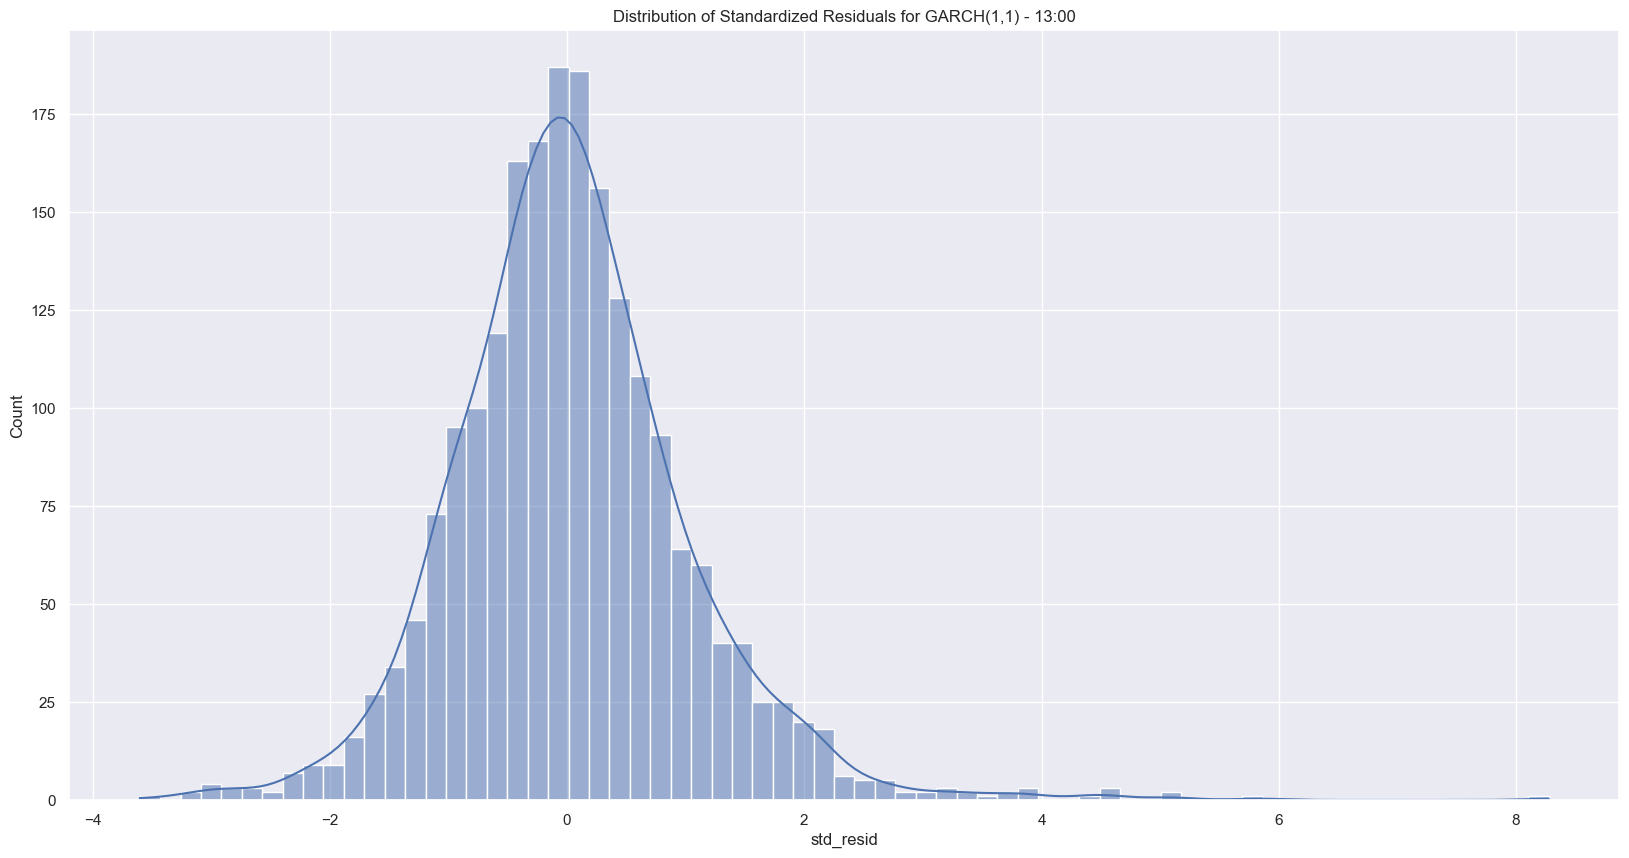

In [28]:
# Plotting the standardized residuals of our garch model

sns.histplot(arch_lasso_exp.std_resid, kde=True)
plt.title('Distribution of Standardized Residuals for GARCH(1,1) - ' + str(b) + ':00')

Text(0.5, 1.0, 'QQplot for Standardized Residuals - GARCH(1,1) 13:00')

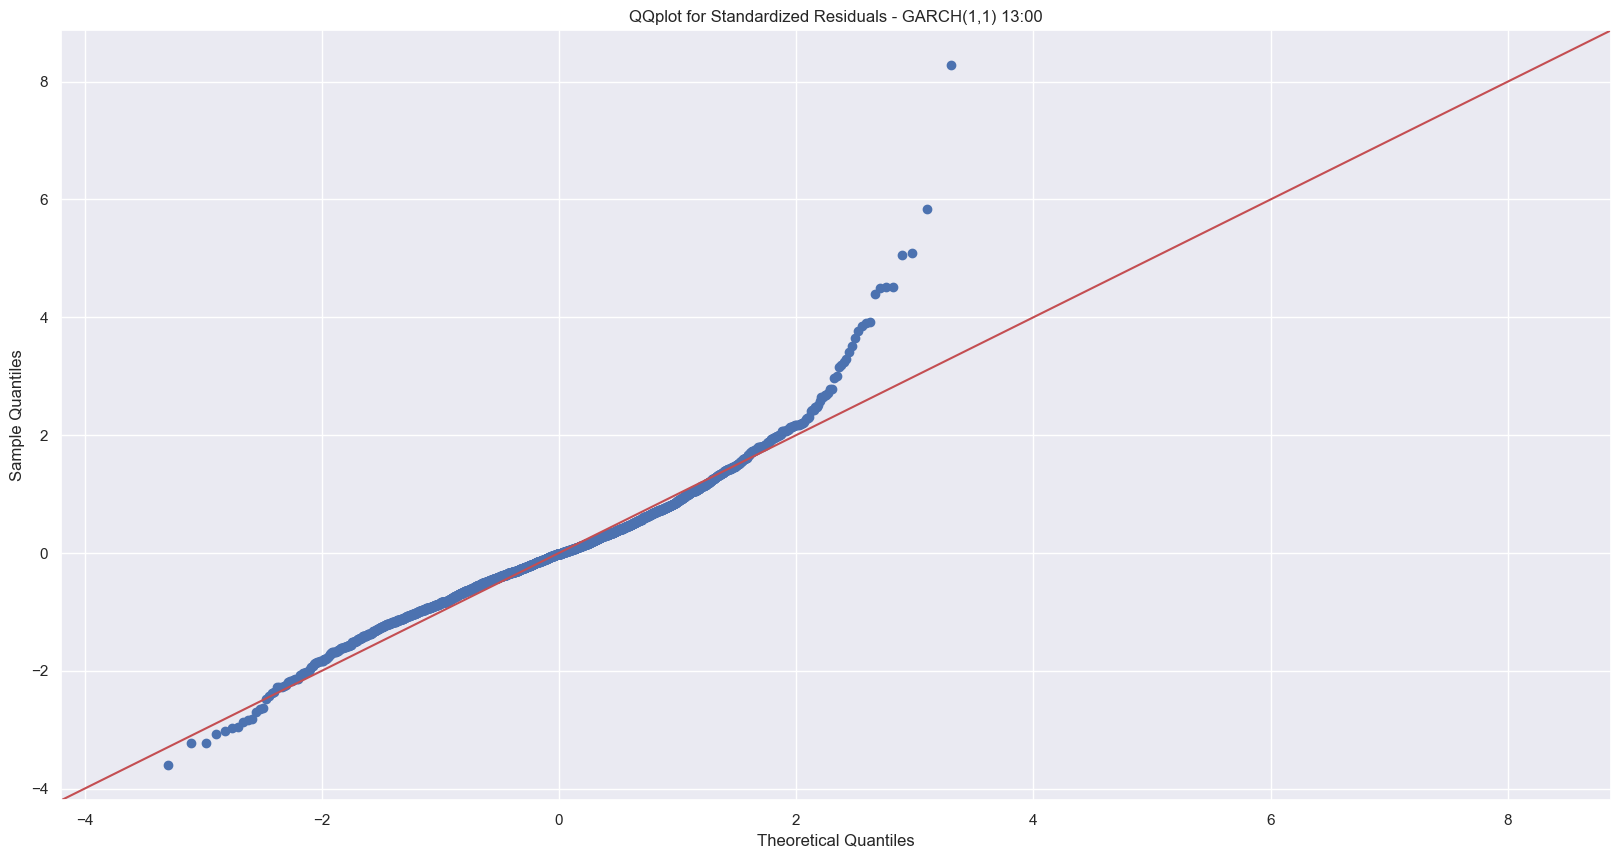

In [29]:
# Plotting the qqplot of our standardized residuals

import statsmodels.api as sm
from scipy.stats import norm
import pylab

x = arch_lasso_exp.std_resid
sm.qqplot(x, line='45')

plt.title('QQplot for Standardized Residuals - GARCH(1,1) ' + str(b) + ':00')

In [30]:
# Training every garch model for every hour ( takes the residuals from our trained lasso models)


%%capture
from scipy import stats

model = []
pvalue = []
meanval = []
length_resid = []
Q1 = []
Q3 = []

for hour in hours:
    arch_lasso = arch_model(lasso[hour]['Residual'], vol='GARCH', p=1,q=1, dist='t', mean='Zero')
    arch_lasso = arch_lasso.fit()
    x = arch_lasso.std_resid
    stat_test = stats.kstest(x, "norm", alternative='less')
    q1 = np.quantile(x, .25)
    q3 = np.quantile(x, .75)
    model.append('Garch_Lasso['+str(hour)+']')
    pvalue.append(stat_test.pvalue)
    meanval.append(np.mean(x))
    length_resid.append(len(x))
    Q1.append(q1)
    Q3.append(q3)



UsageError: Line magic function `%%capture` not found.


In [31]:
# Summary of results of every Garch_lasso trained

df_arch_results = pd.DataFrame(columns=['Model', 'Pvalues for Normality', 'Mean', 'Sample Length', 'Q1', 'Q3'])
df_arch_results['Model'] = model
df_arch_results['Pvalues for Normality'] = pvalue
df_arch_results['Mean'] = meanval
df_arch_results['Sample Length'] = length_resid
df_arch_results['Q1'] = Q1
df_arch_results['Q3'] = Q3
df_arch_results

NameError: name 'pvalue' is not defined

# Simulation of AR(1) process and comparing with every garch_model - WIP

In [ ]:
from statsmodels.tsa.arima_process import ArmaProcess

ar = np.array([1, -0.9])
ma = np.array([1])

sim_step = []
mean = []
sd = []

for j in range(len(df_arch_results)):
    for i in range(0,1000):
        ar_factor = ArmaProcess(ar,ma)
        sim_data = ar_factor.generate_sample(nsample=df_arch_results.loc[j][3])
    sim_step.append('sim_arch_lasso_sample_' + str(j))
    mean.append(np.mean(sim_data))
    sd.append(np.std(sim_data))
        

df_simulation = pd.DataFrame(columns=['Simulation', 'Mean', 'SD'])
df_simulation['Simulation'] = sim_step
df_simulation['Mean'] = mean
df_simulation['SD'] = sd
df_simulation
df_compare = pd.concat([df_arch_results, df_simulation], axis="columns")

check = []

for i in range(len(df_compare)):
    if df_compare.iloc[i][7] >= df_compare.iloc[i][4] and df_compare.iloc[i][7] <= df_compare.iloc[i][5]:
        check.append('OK')
    else:
        check.append('NO')

df_compare['Test'] = check

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [ ]:
df_compare

,Model,Pvalues for Normality,Mean,Sample Length,Q1,Q3,Simulation,Mean,SD,Test
0,Garch_Lasso[0],0.000845,0.003806,1987,-0.611011,0.560550,sim_arch_lasso_sample_0,0.374257,2.385133,OK
1,Garch_Lasso[1],0.000003,-0.010051,1987,-0.553597,0.515177,sim_arch_lasso_sample_1,0.008107,2.094932,OK
2,Garch_Lasso[2],0.000055,-0.016319,1989,-0.545404,0.588191,sim_arch_lasso_sample_2,0.121182,2.258013,OK
3,Garch_Lasso[3],0.000004,-0.019965,1993,-0.517105,0.588423,sim_arch_lasso_sample_3,0.178720,2.526125,OK
4,Garch_Lasso[4],0.000008,-0.015705,1985,-0.516340,0.567943,sim_arch_lasso_sample_4,-0.167383,2.179346,OK
5,Garch_Lasso[5],0.000014,-0.022904,1982,-0.556075,0.566241,sim_arch_lasso_sample_5,-0.030778,2.363641,OK
6,Garch_Lasso[6],0.006396,-0.017010,1986,-0.598979,0.556364,sim_arch_lasso_sample_6,0.140277,2.172552,OK
7,Garch_Lasso[7],0.059287,-0.006924,1989,-0.631389,0.555412,sim_arch_lasso_sample_7,0.167697,2.173792,OK
8,Garch_Lasso[8],0.233113,-0.007518,1990,-0.677824,0.630786,sim_arch_lasso_sample_8,0.066126,2.377736,OK
9,Garch_Lasso[9],0.208538,-0.004212,1984,-0.672204,0.609806,sim_arch_lasso_sample_9,-0.050812,2.238915,OK
